# Problem Statement

Forecast the CocaCola prices and Airlines Passengers data set. 
<br>Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. <br>Finally which model you will use for Forecasting.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf 

import warnings
warnings.filterwarnings('ignore')

In [2]:
cs = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cs.head(6)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995


In [3]:
cs.shape

(42, 2)

In [4]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [5]:
cs.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


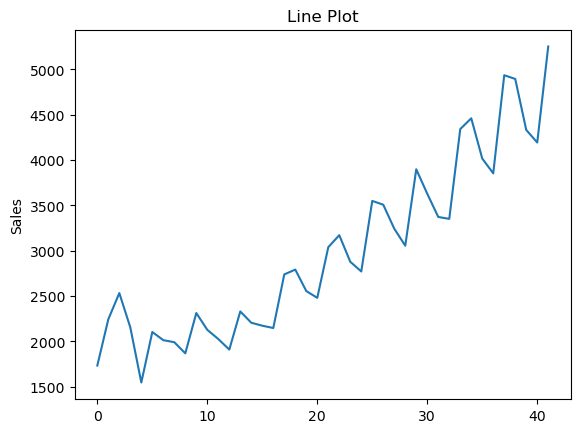

In [6]:
#Visualizing the overall data in order to the components present in our data

plt.title("Line Plot")
plt.ylabel("Sales")
plt.plot(cs['Sales'])

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

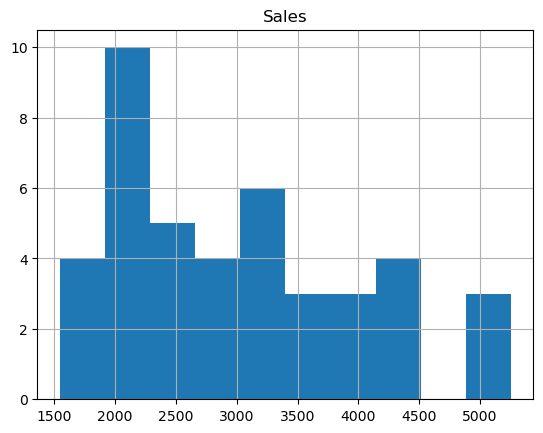

In [7]:
cs.hist()

Text(0.5, 1.0, 'Density Plot')

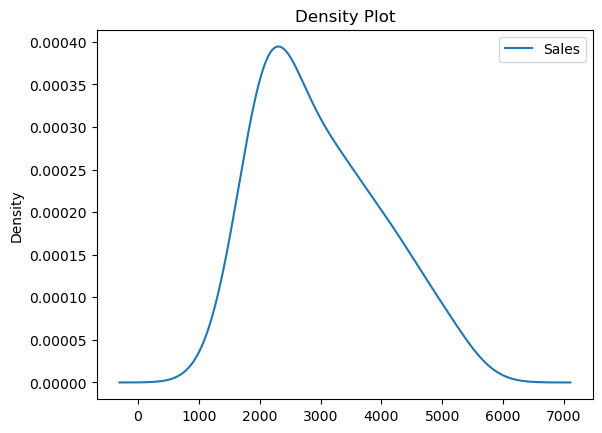

In [8]:
cs.plot(kind = 'kde')
plt.title("Density Plot")

In [9]:
quarters = ['Q1','Q2','Q3','Q4']
n = cs['Quarter'][0]
n[0:2]

'Q1'

In [10]:
cs['quarter'] = 0
for i in range(42):
    n = cs['Quarter'][i]
    cs['quarter'][i] = n[0:2]

In [11]:
dummy = pd.DataFrame(pd.get_dummies(cs['quarter']))
dummy

,Q1,Q2,Q3,Q4
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True
4,True,False,False,False
5,False,True,False,False
6,False,False,True,False
7,False,False,False,True
8,True,False,False,False
9,False,True,False,False


In [12]:
cs = pd.concat([cs,dummy],axis=1)
cs.head(6)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,True,False,False,False
1,Q2_86,2244.960999,Q2,False,True,False,False
2,Q3_86,2533.804993,Q3,False,False,True,False
3,Q4_86,2154.962997,Q4,False,False,False,True
4,Q1_87,1547.818996,Q1,True,False,False,False
5,Q2_87,2104.411995,Q2,False,True,False,False


In [13]:
cs["t"] = np.arange(1,43)

cs["t_squared"] = cs["t"]*cs["t"]
cs.columns
cs["log_Sales"] = np.log(cs["Sales"])
cs.head(6)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,True,False,False,False,5,25,7.344602
5,Q2_87,2104.411995,Q2,False,True,False,False,6,36,7.651791


<Axes: xlabel='quarter', ylabel='Quarter'>

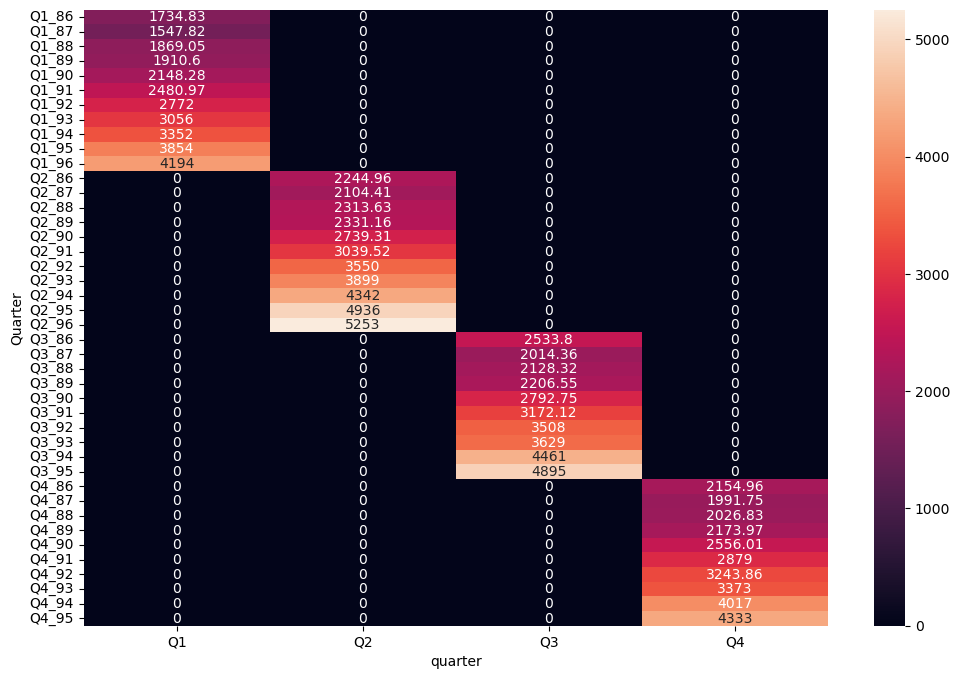

In [14]:
plt.figure(figsize=(12,8))
heatmap_y_quarter = pd.pivot_table(data=cs,values="Sales",index="Quarter",columns="quarter",aggfunc="mean", fill_value = 0)
sns.heatmap(heatmap_y_quarter,annot=True,fmt="g")

<Axes: xlabel='quarter', ylabel='Sales'>

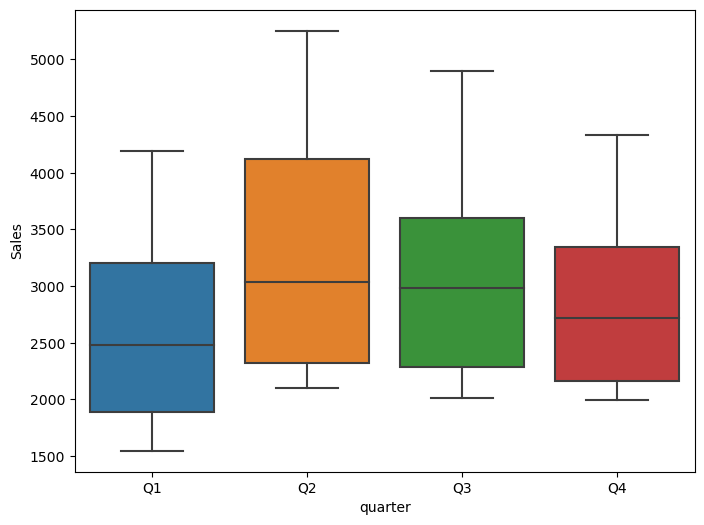

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x="quarter",y="Sales",data=cs)

Text(0.5, 1.0, 'Lag Plot')

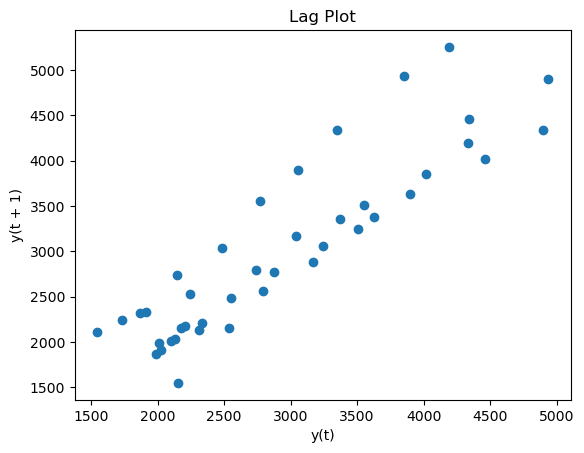

In [16]:
lag_plot(cs['Sales'])
plt.title("Lag Plot")

Text(0, 0.5, 'Autocorrelation (r2 value)')

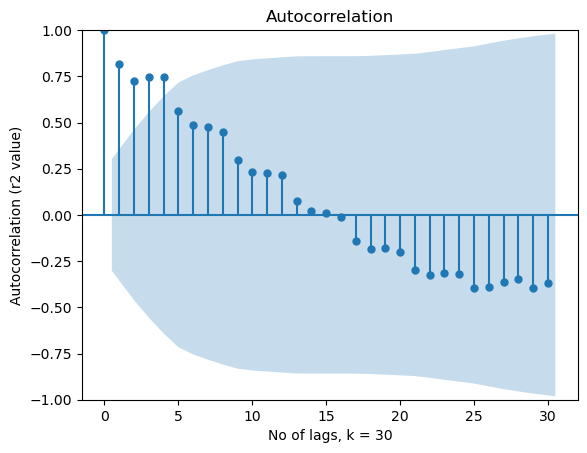

In [17]:
plot_acf(cs['Sales'], lags = 30)                                              
plt.xlabel("No of lags, k = 30")
plt.ylabel("Autocorrelation (r2 value)")

<Axes: xlabel='quarter', ylabel='Sales'>

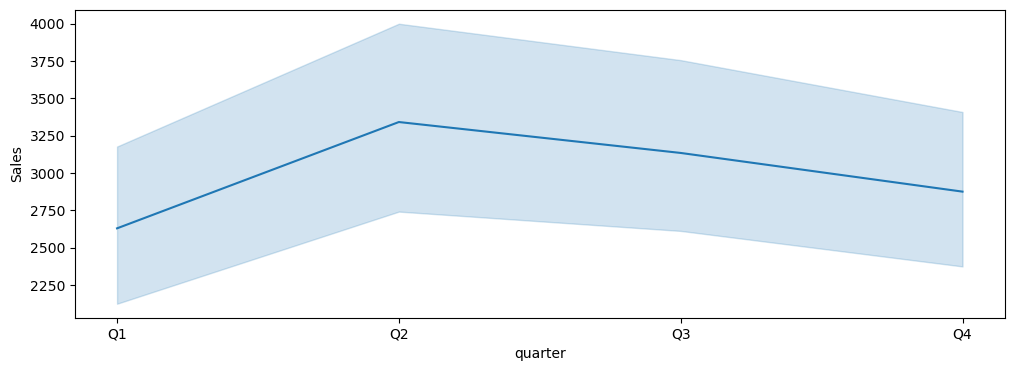

In [18]:
plt.figure(figsize=(12,4))
sns.lineplot(x="quarter",y="Sales",data=cs)

<Axes: >

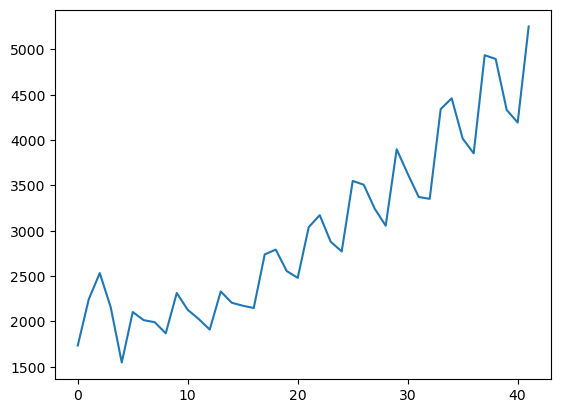

In [19]:
cs['Sales'].plot()

In [20]:
train = cs.head(37)
test  = cs.tail(4)

In [21]:
train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,True,False,False,False,5,25,7.344602
5,Q2_87,2104.411995,Q2,False,True,False,False,6,36,7.651791
6,Q3_87,2014.362999,Q3,False,False,True,False,7,49,7.608058
7,Q4_87,1991.746998,Q4,False,False,False,True,8,64,7.596767
8,Q1_88,1869.049999,Q1,True,False,False,False,9,81,7.533186
9,Q2_88,2313.631996,Q2,False,True,False,False,10,100,7.746574


In [22]:
test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
38,Q3_95,4895.0,Q3,False,False,True,False,39,1521,8.495970
39,Q4_95,4333.0,Q4,False,False,False,True,40,1600,8.374015
40,Q1_96,4194.0,Q1,True,False,False,False,41,1681,8.341410
41,Q2_96,5253.0,Q2,False,True,False,False,42,1764,8.566555


# Linear Model

In [23]:
linear = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

671.6427504390426

# Exponential Model

In [24]:
Exp = smf.ols('log_Sales~t',data=train).fit() 
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
print("Root Mean Square Error : ",rmse_Exp)

Root Mean Square Error :  513.4107967981105


# Quadratic Model

In [25]:
Quad = smf.ols('Sales~t+t_squared',data=train).fit() 
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
print("Root Mean Square Error : ",rmse_Quad)

Root Mean Square Error :  424.2400896279167


# Additive Seasonality Model

In [26]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit() 
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
print("Root Mean Square Error : ",rmse_add_sea)

Root Mean Square Error :  1917.8628612596376


# Additive Seasonality Qudratic Model

In [27]:
add_sea_quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit() 
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
print("Root Mean Square Error : ",rmse_add_sea_quad)

Root Mean Square Error :  265.8279691859272


# Multiplicative Seasonality Model

In [28]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train).fit() 
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_sea)

Root Mean Square Error :  2010.1194325040885


# Multiplicative Additive Seasonality

In [29]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit() 
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_add_sea)

Root Mean Square Error :  262.4958466945762


In [30]:
Final_data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
Final_result = pd.DataFrame(Final_data)
Final_result.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,262.495847
4,rmse_add_sea_quad,265.827969
2,rmse_Quad,424.240090
1,rmse_Exp,513.410797
0,rmse_linear,671.642750
3,rmse_add_sea,1917.862861
5,rmse_Mult_sea,2010.119433


In [31]:
Final_pred = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=cs).fit()

In [32]:
pred  = pd.Series(Final_pred.predict(cs))
pred

0     7.339224
1     7.579747
2     7.571328
3     7.491254
4     7.435892
5     7.676415
6     7.667996
7     7.587922
8     7.532561
9     7.773084
10    7.764665
11    7.684591
12    7.629229
13    7.869752
14    7.861333
15    7.781259
16    7.725898
17    7.966421
18    7.958002
19    7.877928
20    7.822566
21    8.063089
22    8.054670
23    7.974596
24    7.919235
25    8.159758
26    8.151339
27    8.071265
28    8.015903
29    8.256426
30    8.248007
31    8.167933
32    8.112572
33    8.353095
34    8.344676
35    8.264602
36    8.209240
37    8.449763
38    8.441344
39    8.361270
40    8.305909
41    8.546432
dtype: float64

In [33]:
cs["forecasted_Sales"] = pd.Series(np.exp(pred))

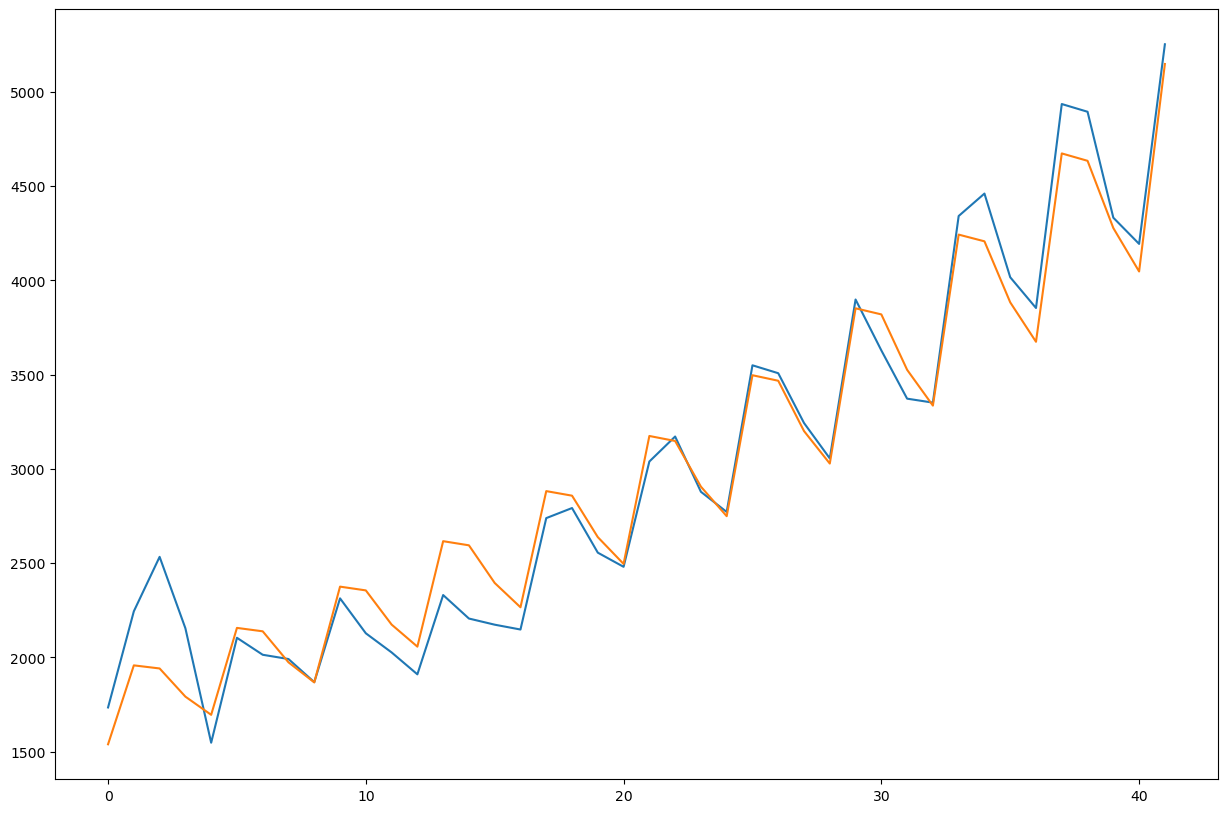

In [34]:
plt.figure(figsize=(15,10))
plt.plot(cs[['Sales','forecasted_Sales']].reset_index(drop=True))